In [1]:
import birdwatcher as bw

**A short test video of a zebra finch is distributed with Birdwatcher**

In [2]:
vf = bw.testvideosmall()
vf # this is a VideoFileStream

In [3]:
vf.streammetadata

{'index': 0,
 'codec_name': 'h264',
 'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
 'profile': 'Constrained Baseline',
 'codec_type': 'video',
 'codec_time_base': '1/50',
 'codec_tag_string': 'avc1',
 'codec_tag': '0x31637661',
 'width': 1280,
 'height': 720,
 'coded_width': 1280,
 'coded_height': 720,
 'has_b_frames': 0,
 'sample_aspect_ratio': '1:1',
 'display_aspect_ratio': '16:9',
 'pix_fmt': 'yuv420p',
 'level': 41,
 'chroma_location': 'left',
 'refs': 1,
 'is_avc': 'true',
 'nal_length_size': '4',
 'r_frame_rate': '25/1',
 'avg_frame_rate': '25/1',
 'time_base': '1/12800',
 'start_pts': 0,
 'start_time': '0.000000',
 'duration_ts': 254464,
 'duration': '19.880000',
 'bit_rate': '2228783',
 'bits_per_raw_sample': '8',
 'nb_frames': '497',
 'disposition': {'default': 1,
  'dub': 0,
  'original': 0,
  'comment': 0,
  'lyrics': 0,
  'karaoke': 0,
  'forced': 0,
  'hearing_impaired': 0,
  'visual_impaired': 0,
  'clean_effects': 0,
  'attached_pic': 0,
  'timed_thumb

Some useful properties and methods

In [4]:
print(f"average frame rate: {vf.avgframerate}")
print(f"numer of frames (reported): {vf.nframes}")
print(f"counted numer of frames: {vf.count_frames()}")
print(f"duration: {vf.duration}")
print(f"framewidth: {vf.framewidth}")
print(f"frameheight: {vf.frameheight}")
print(f"framesize: {vf.framesize}")

average frame rate: 25.0
numer of frames (reported): 497
counted numer of frames: 497
duration: 19.88
framewidth: 1280
frameheight: 720
framesize: (1280, 720)


**Iterate of frames in video file. Frames are numpy arrays (height, width, color) of uint8 values,**

In [5]:
for frame in vf.iter_frames():
    print(frame.shape, end = ', ')

(720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 1280, 3), (720, 12

Get a frame at a given time, say at 10 s.

In [6]:
frame = vf.get_frameat('00:10.')

Get a frame by number (this is inefficient for long videos, but precise, video is decoded up to that point)

In [7]:
frame = vf.get_frame(250)

In [8]:
print(frame) # numpy array, uint8

[[[ 75  70  71]
  [ 97  92  93]
  [ 91  86  87]
  ...
  [141 144 144]
  [141 144 144]
  [141 144 144]]

 [[ 79  74  75]
  [ 99  94  95]
  [ 87  82  83]
  ...
  [141 144 144]
  [141 144 144]
  [141 144 144]]

 [[ 84  79  80]
  [100  95  96]
  [ 83  78  79]
  ...
  [141 144 144]
  [141 144 144]
  [141 144 144]]

 ...

 [[  5   2   3]
  [  5   2   3]
  [  5   2   3]
  ...
  [  5   2   3]
  [  5   2   3]
  [  5   2   3]]

 [[  5   2   3]
  [  5   2   3]
  [  5   2   3]
  ...
  [  5   2   3]
  [  5   2   3]
  [  5   2   3]]

 [[  5   2   3]
  [  5   2   3]
  [  5   2   3]
  ...
  [  5   2   3]
  [  5   2   3]
  [  5   2   3]]]


**Look at frame**

In [9]:
from birdwatcher.plotting import imshow_frame # birdwatcher has vizualization tools
%matplotlib inline

(<Figure size 1008x1792 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f598a5a1dc0>)

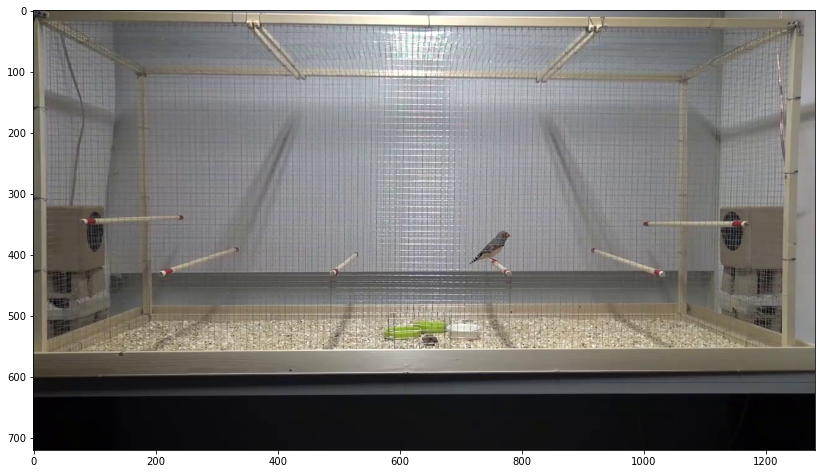

In [10]:
imshow_frame(frame)

For most processing it is important to realize that the `iter_frames` method returns a Frames object. This is a central type in Birdwatcher as it has a lot of useful methods for processing, analysis, and writing videos. Many methods of a Frames object return another Frames object. This way you can quickly setup a processing pipeline before doing something final such as writing a video or analysis.

In [15]:
frames = vf.iter_frames()
frames

In [16]:
frames_process = frames.blur((10,10)).togray().draw_framenumbers()
frames_process

In [17]:
vf_processed = frames_process.tovideo('processed_frames.mp4', framerate=vf.avgframerate)

(<Figure size 1008x1792 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5988061ac0>)

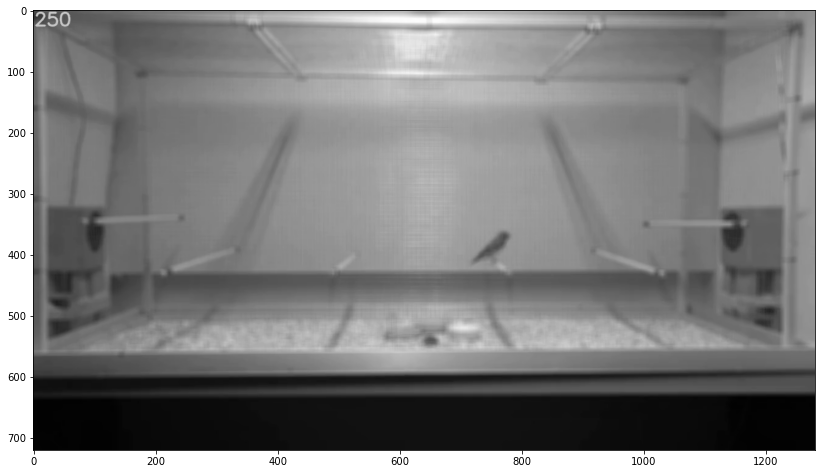

In [18]:
imshow_frame(vf_processed.get_frame(250))

In [26]:
from ipywidgets import interact

In [29]:
@interact(frameno=(0, vf.nframes-1))
def show_frame(frameno=0):
    imshow_frame(vf.get_frame(frameno))

interactive(children=(IntSlider(value=0, description='frameno', max=496), Output()), _dom_classes=('widget-int…

In [30]:
@interact(time=(0., vf.duration))
def show_frame(time=0):
    imshow_frame(vf.get_frameat(f'{time}'))

interactive(children=(FloatSlider(value=0.0, description='time', max=19.88), Output()), _dom_classes=('widget-…